In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
def load_data(filename, FOLDER="./data/airlane"):
    csv_path = os.path.join(FOLDER, filename)
    return pd.read_csv(csv_path)

In [3]:
data_train = load_data("train.csv")
data_test = load_data("test.csv")
display(data_train.head())

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### Dataset Description

The dataset contains an airline passenger satisfaction survey.

Variables:

Gender: Gender of the passengers (Female, Male) 

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

## Data Preprocessing

In [4]:
data_train.drop(['Unnamed: 0','id'], axis=1, inplace=True)
data_test.drop(['Unnamed: 0','id'], axis=1, inplace=True)

data_train['satisfaction'] = data_train['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})
data_test['satisfaction'] = data_test['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})

In [5]:
data_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [6]:
data_test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


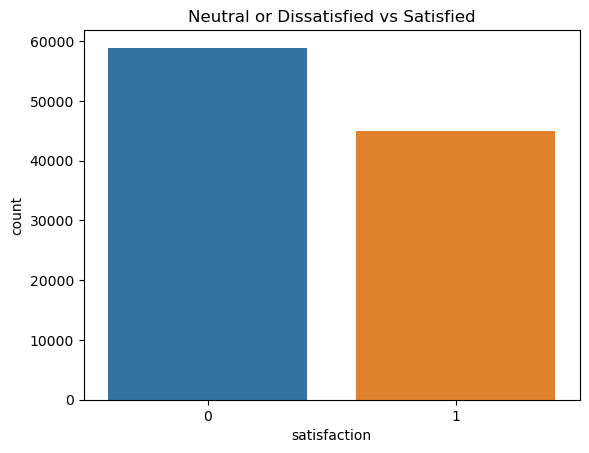

In [7]:
sns.countplot(x ='satisfaction', data = data_train)
plt.title('Neutral or Dissatisfied vs Satisfied')
plt.show()

In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [9]:
data_train.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [10]:
numerical_cols = [col for col in data_train.columns if data_train[col].dtypes in ['int64','float64']]
numerical_cols.remove('satisfaction')
numerical_cols

['Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction']

In [13]:
categorical_cols = [col for col in data_train.columns if data_train[col].dtypes in ['object']]
categorical_cols 

['Gender', 'Customer Type', 'Type of Travel', 'Class']

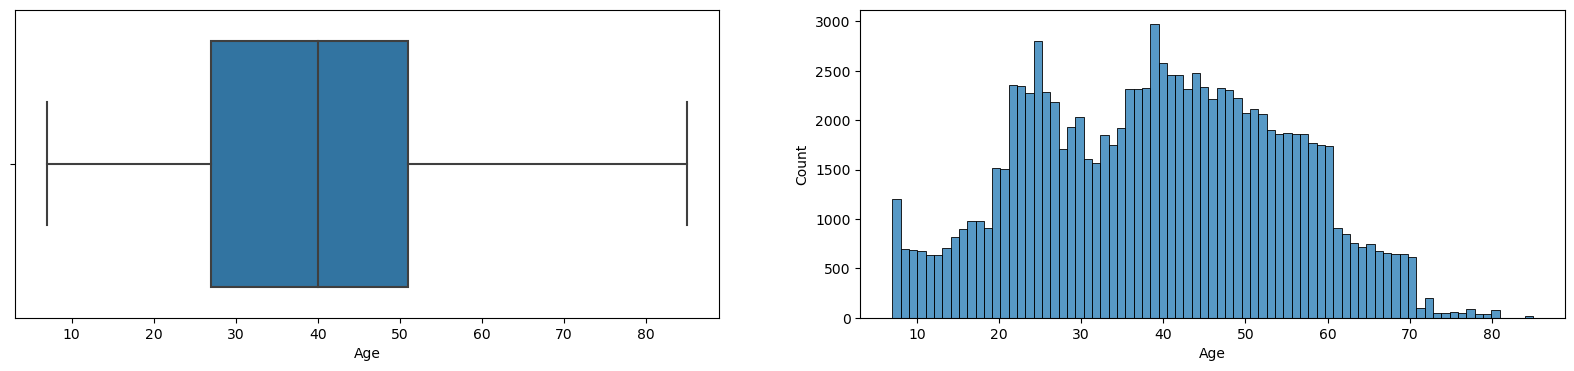

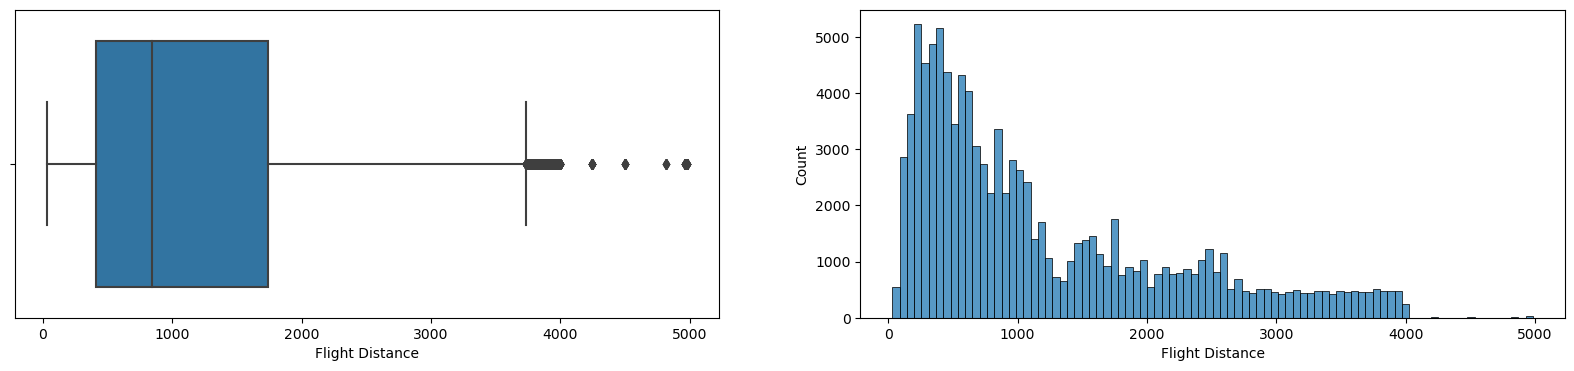

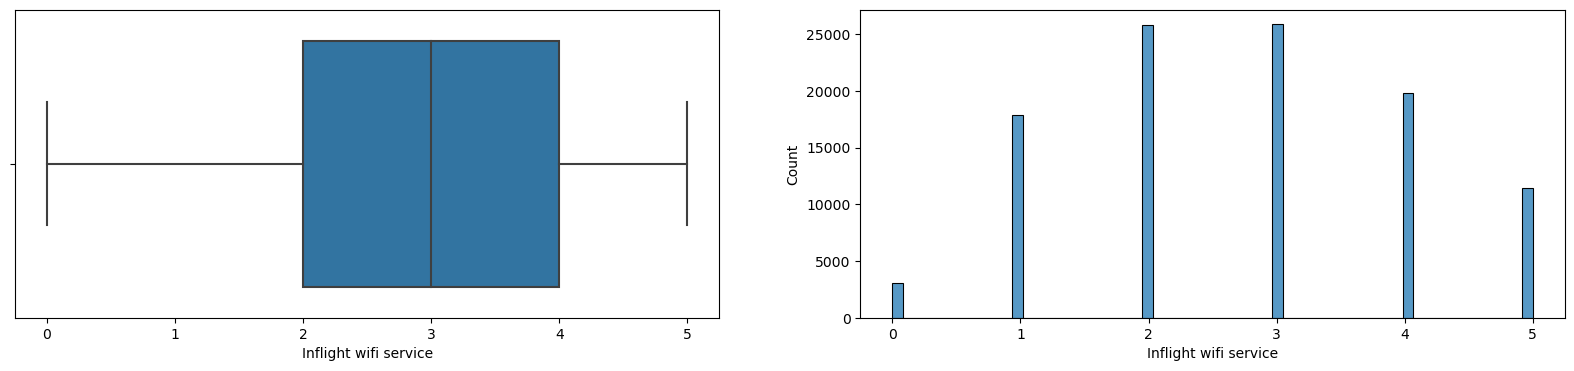

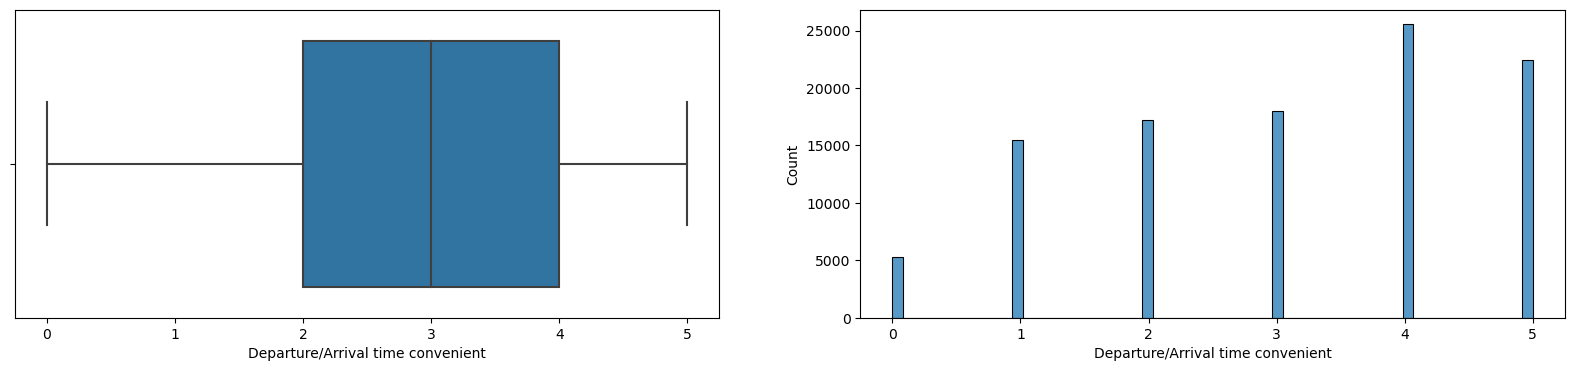

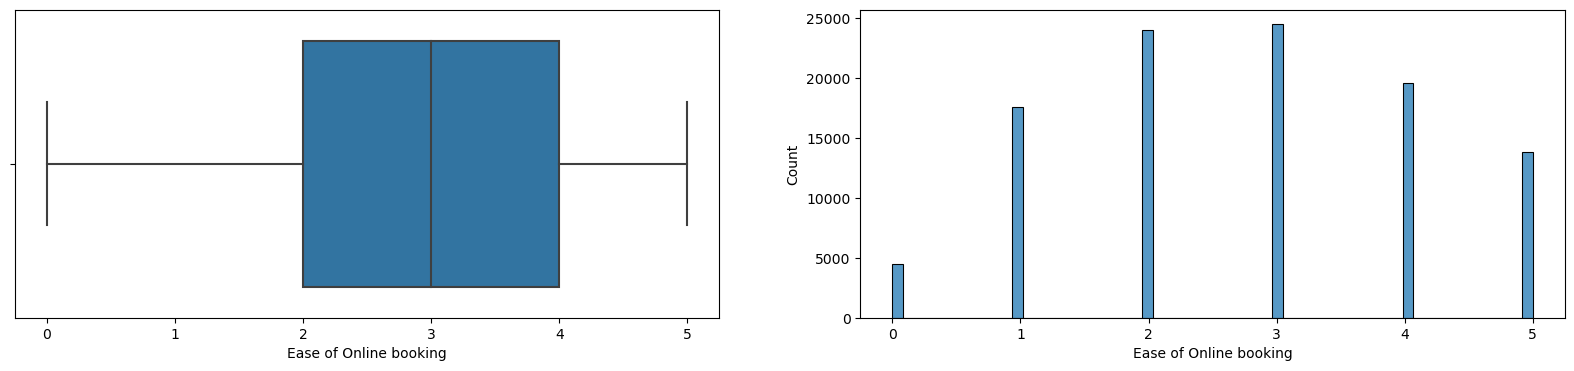

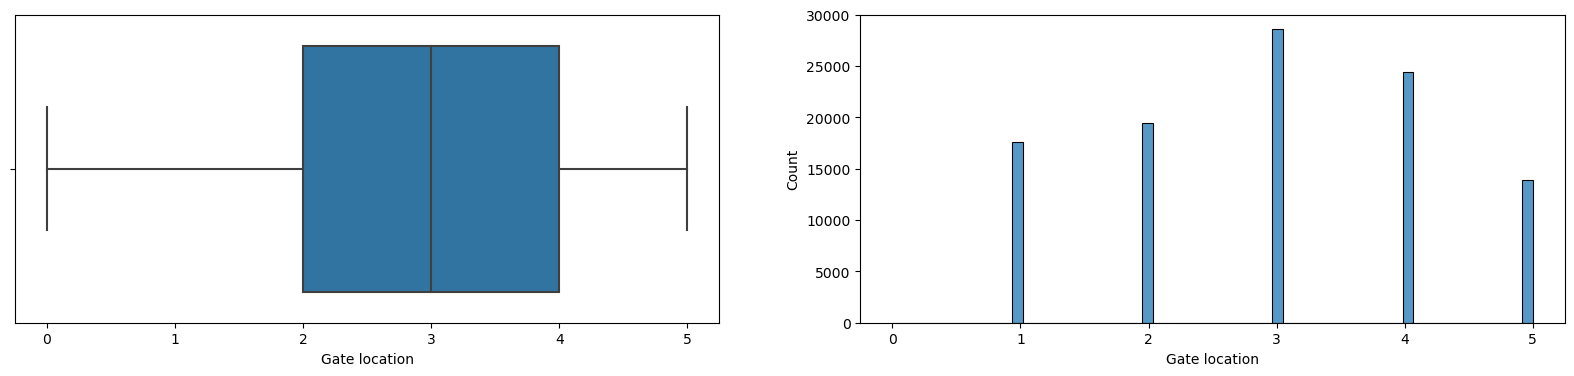

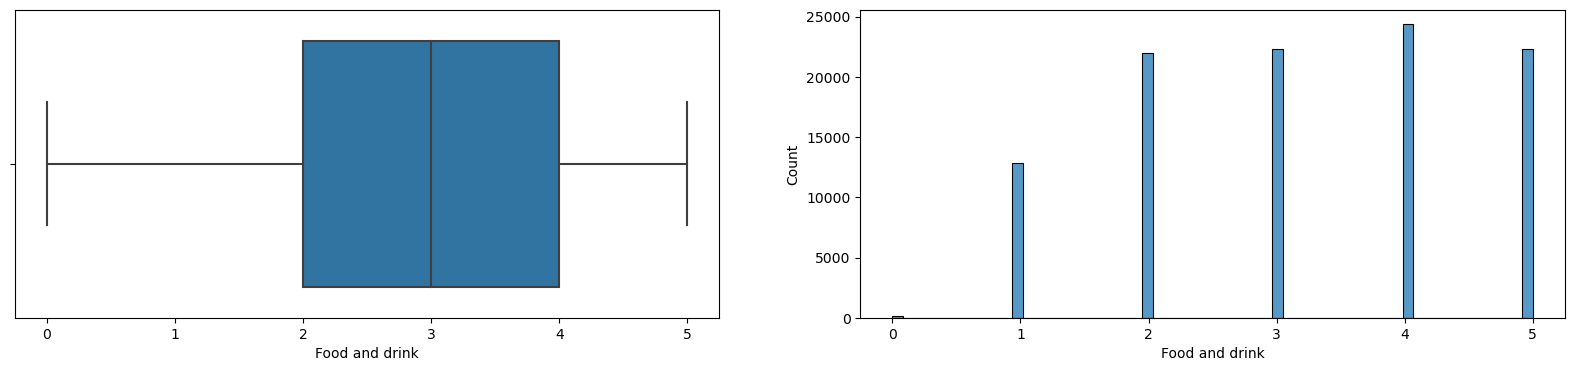

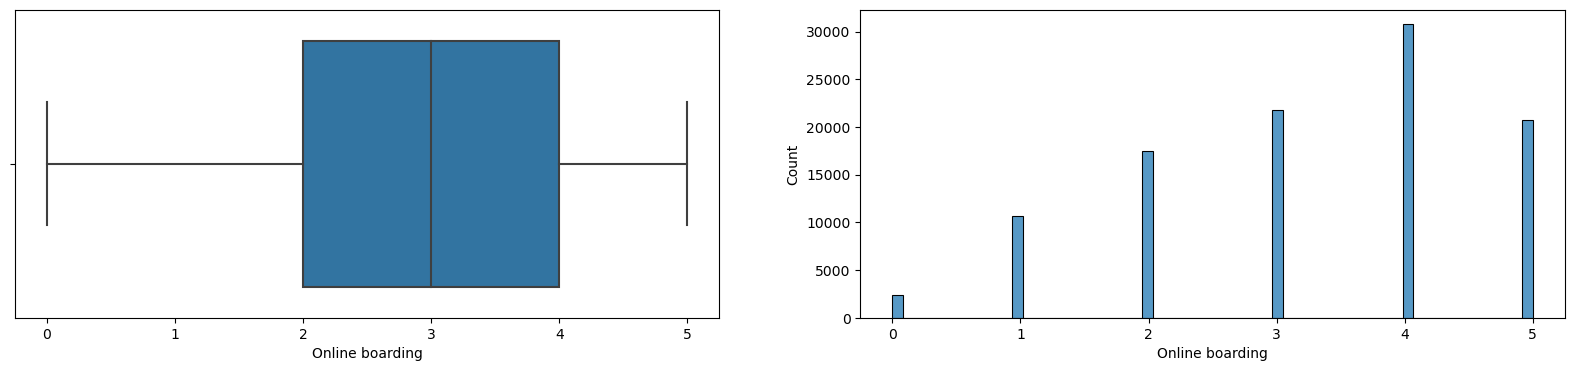

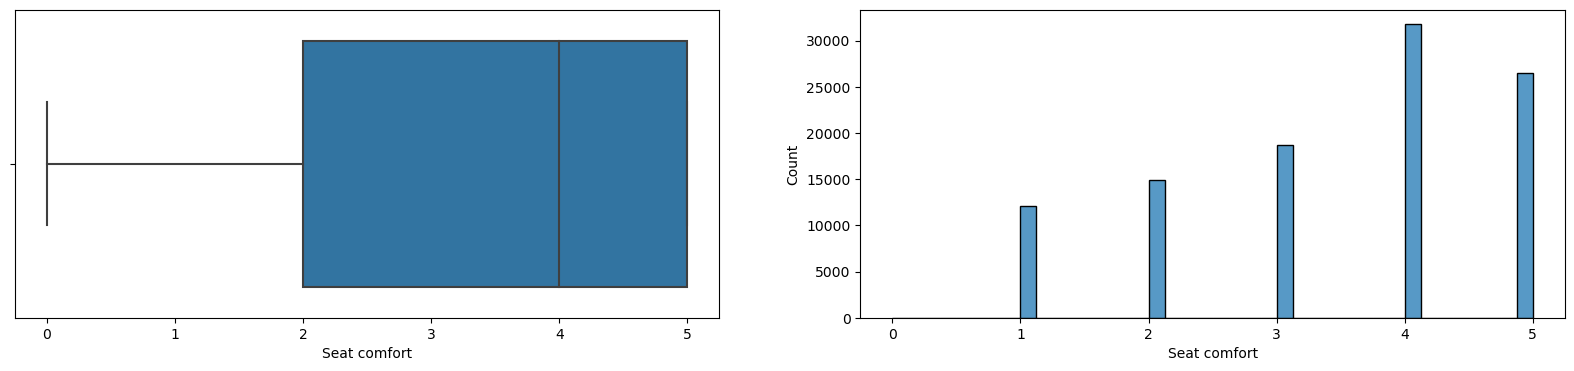

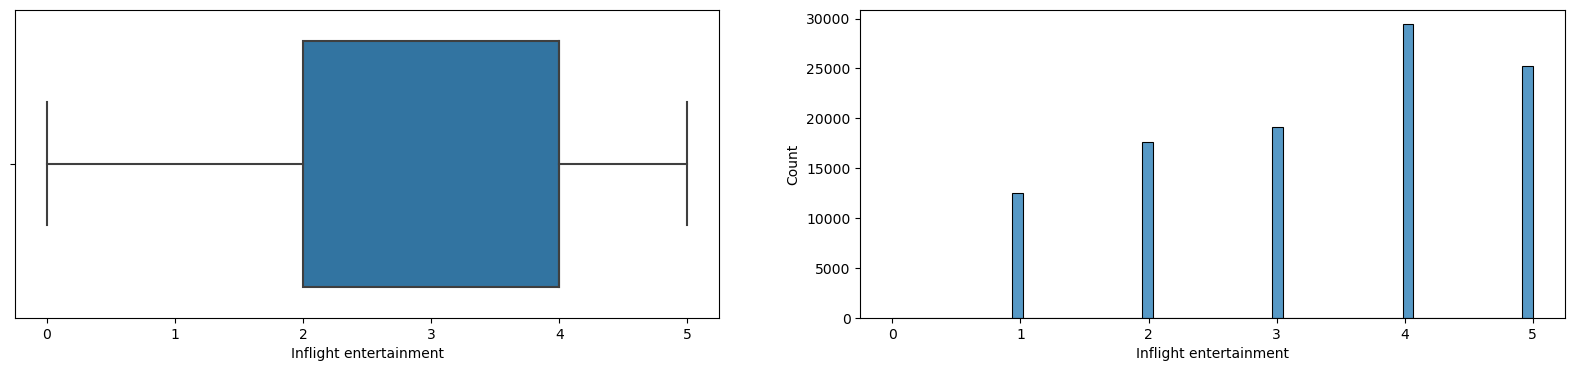

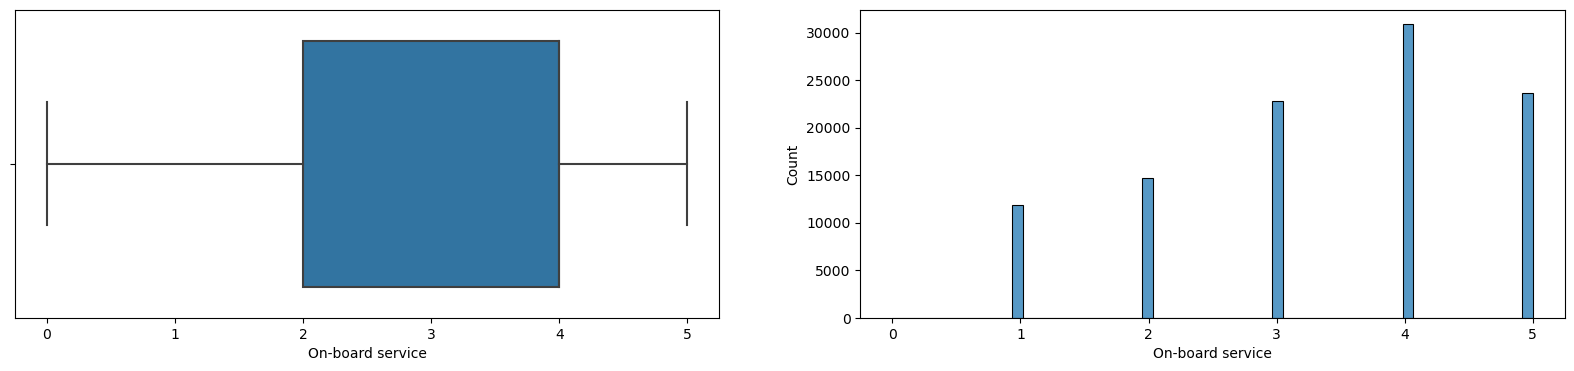

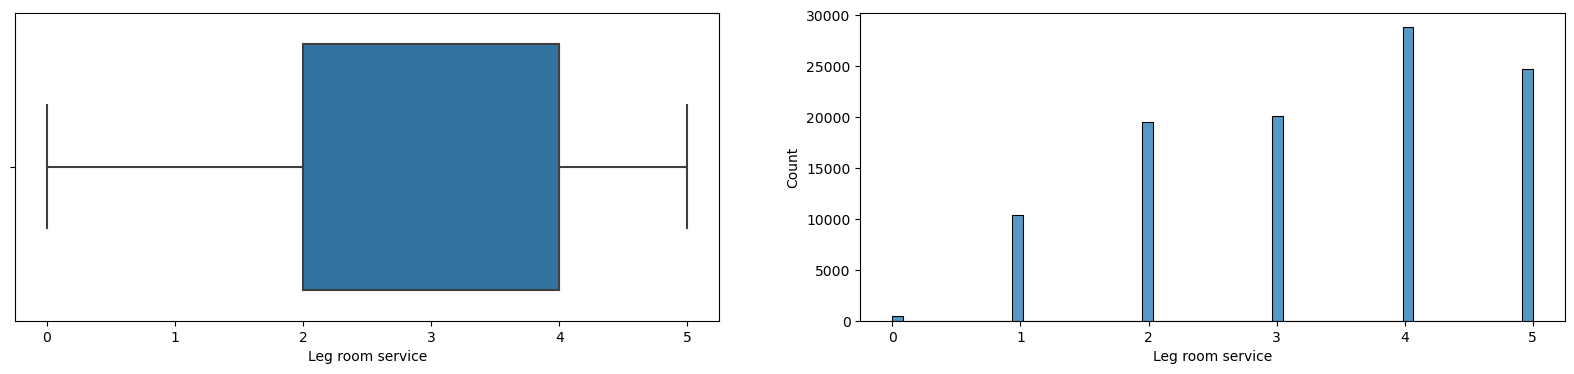

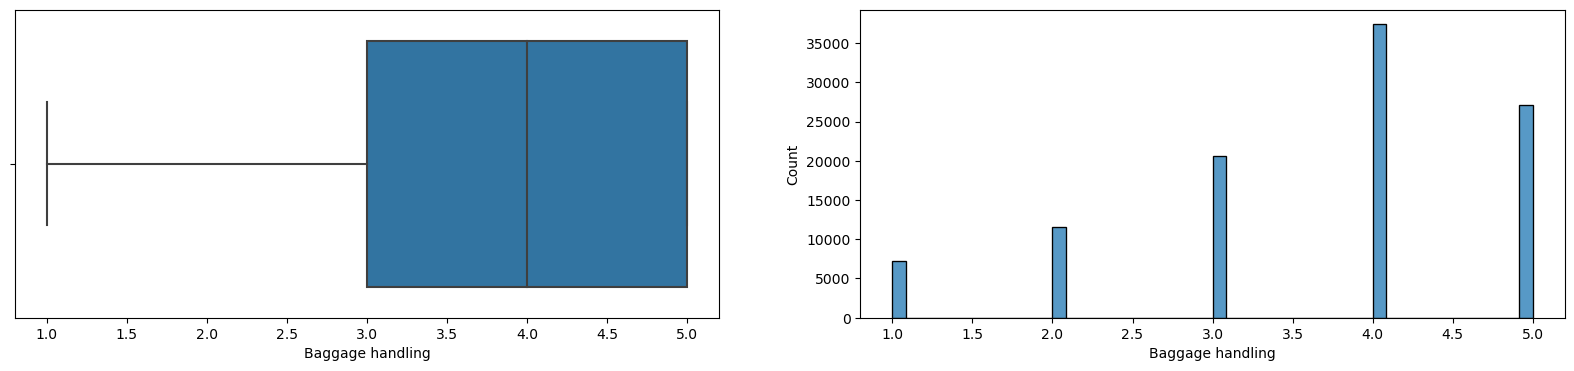

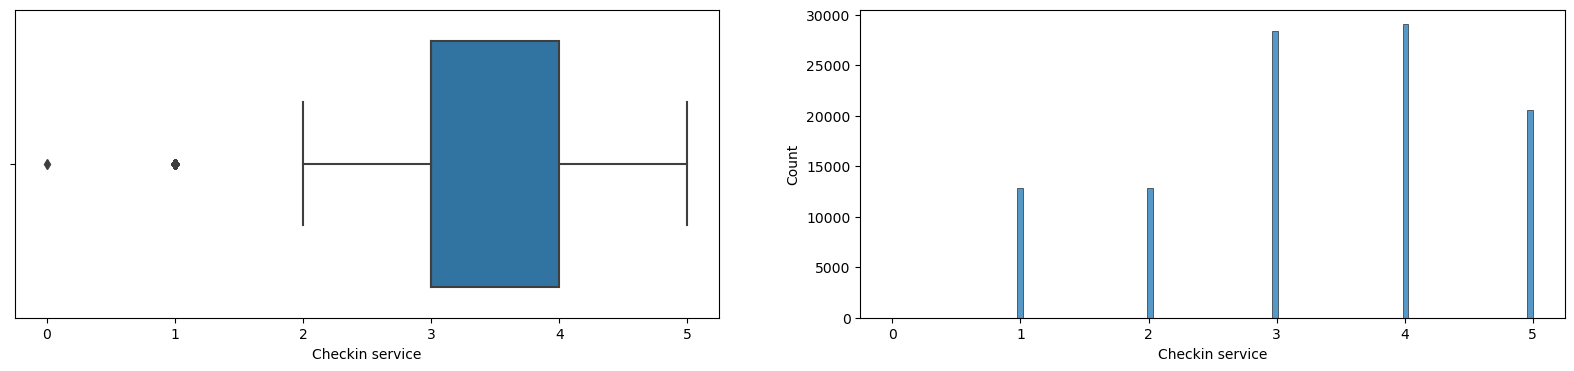

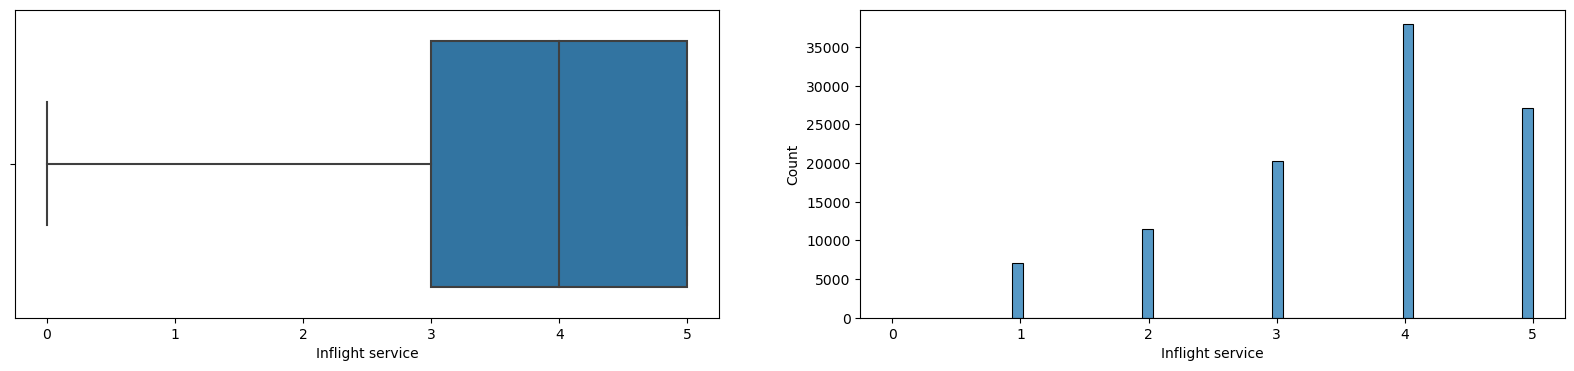

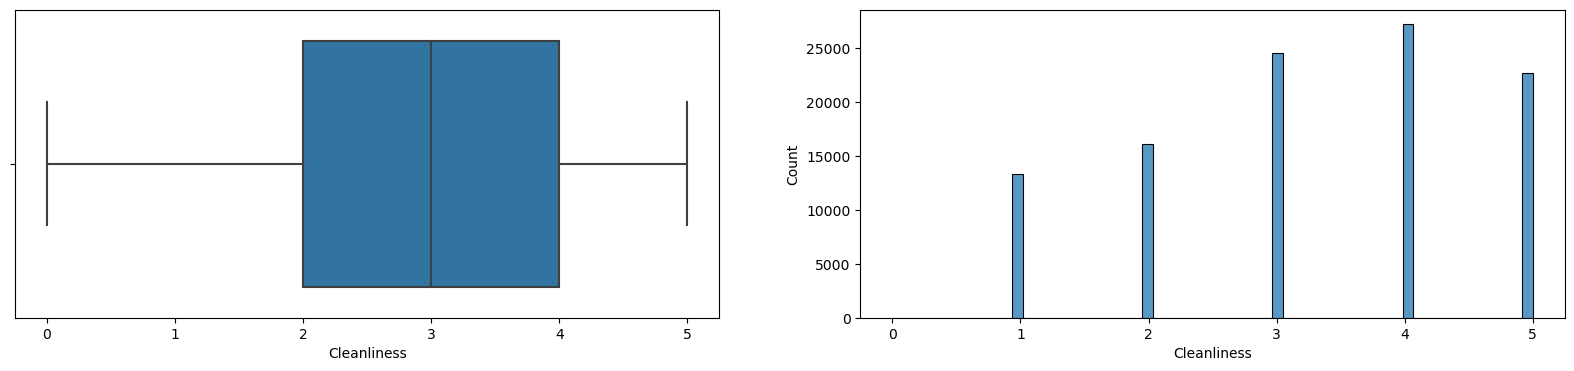

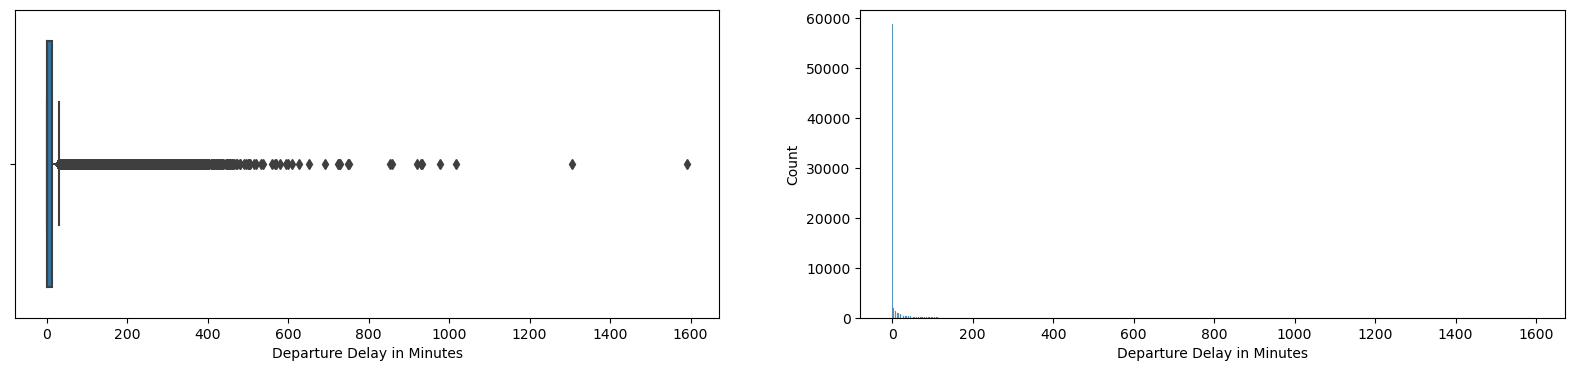

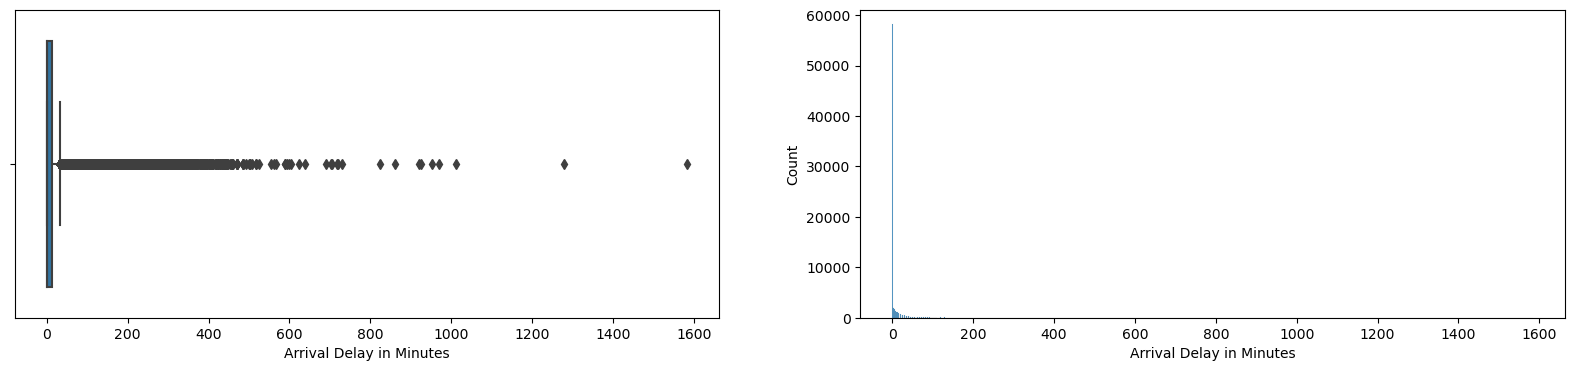

In [14]:
for column_name in numerical_cols:
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    sns.boxplot(x=data_train[column_name],data=data_train)
    plt.subplot(1,2,2)
    sns.histplot(x=data_train[column_name],data=data_train)
    plt.show()

In [15]:
data_train.shape

(103904, 23)

In [16]:
data_train.dropna(axis=0, inplace=True)
data_train.shape

(103594, 23)

In [17]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [18]:
data_test.dropna(axis=0, inplace=True)
data_test.shape

(25893, 23)

## Exploretory Data Analysis

The goal of that analysis is to select features for model according to my own intuition

Let's devide the set of columns to categorical and numerical

In [19]:
numerical_cols = [col for col in data_train.columns if data_train[col].dtypes in ['int64','float64']]
numerical_cols

['Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction']

In [20]:
categorical_cols = [col for col in data_train.columns if data_train[col].dtypes in ['object']]
categorical_cols

['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [21]:
numerical_cols.remove('satisfaction')
numerical_cols

['Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

#### Categorical data

Business travel    71465
Personal Travel    32129
Name: Type of Travel, dtype: int64


<AxesSubplot:>

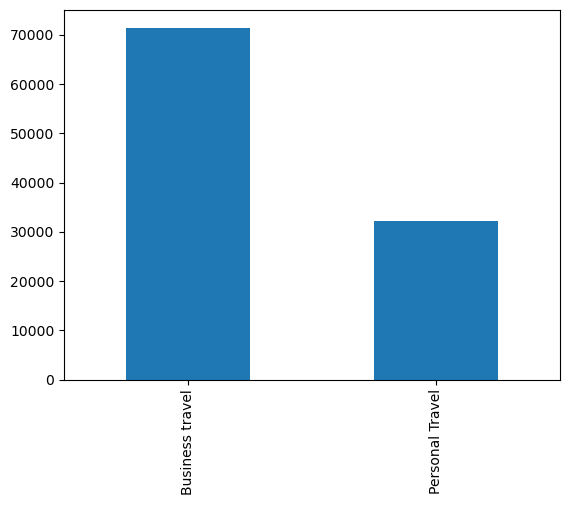

In [22]:
print(data_train['Type of Travel'].value_counts())
data_train['Type of Travel'].value_counts().plot(kind="bar")

Business    49533
Eco         46593
Eco Plus     7468
Name: Class, dtype: int64


<AxesSubplot:>

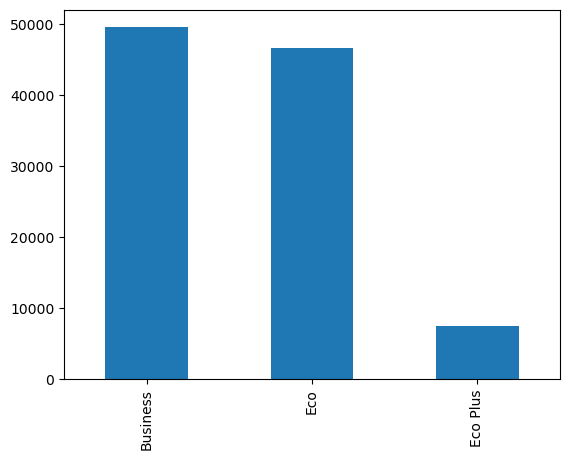

In [23]:
print(data_train['Class'].value_counts())
data_train['Class'].value_counts().plot(kind="bar")

Female    52576
Male      51018
Name: Gender, dtype: int64


<AxesSubplot:>

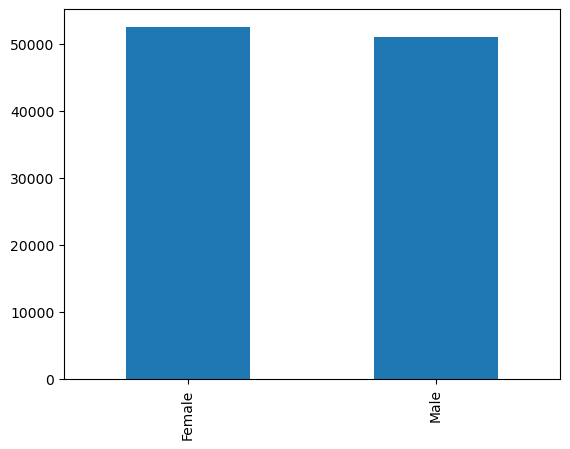

In [24]:
print(data_train['Gender'].value_counts())
data_train['Gender'].value_counts().plot(kind="bar")

Loyal Customer       84662
disloyal Customer    18932
Name: Customer Type, dtype: int64


<AxesSubplot:>

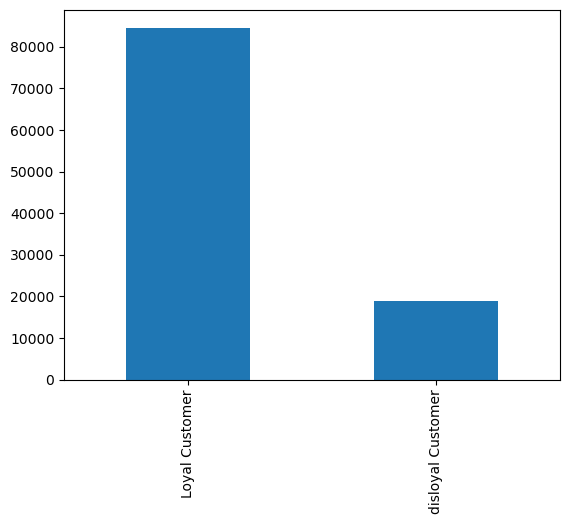

In [25]:
print(data_train['Customer Type'].value_counts())
data_train['Customer Type'].value_counts().plot(kind="bar")

Let's check dependencies between categorical data and responce column

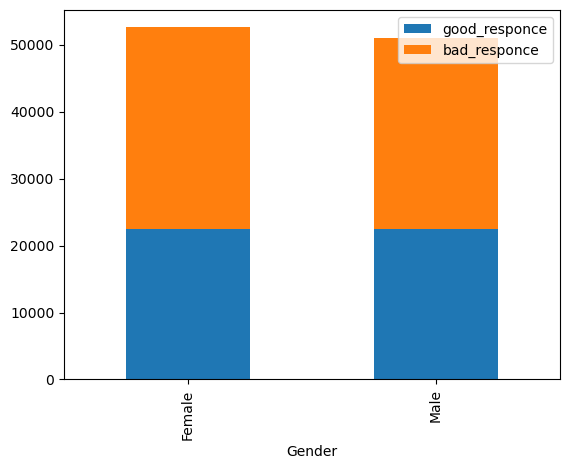

In [26]:
tmp_data = data_train.copy()
tmp_data['good_responce'] = tmp_data['satisfaction']
tmp_data['bad_responce'] = 1 - tmp_data['satisfaction']
tmp_data.groupby('Gender').agg('sum')[['good_responce', 'bad_responce']].plot(kind='bar',
                                                          stacked=True);

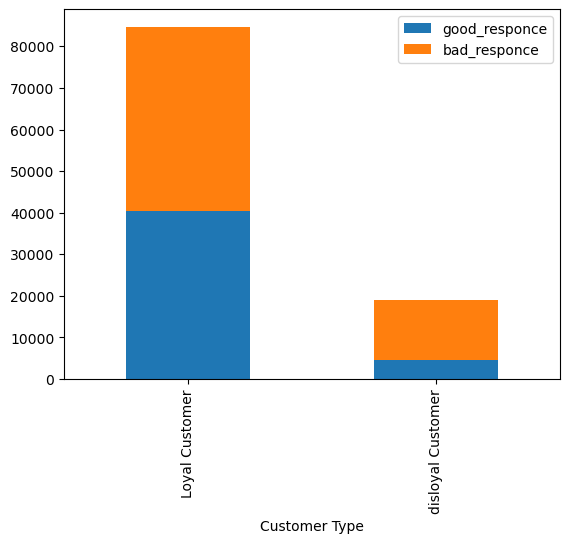

In [27]:
tmp_data.groupby('Customer Type').agg('sum')[['good_responce', 'bad_responce']].plot(kind='bar',
                                                          stacked=True);

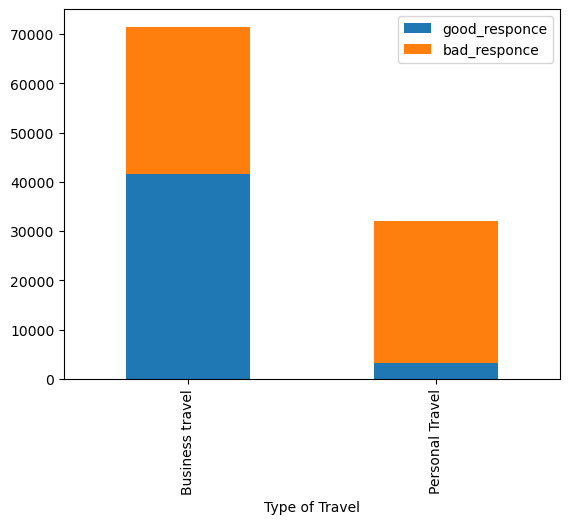

In [28]:
tmp_data.groupby('Type of Travel').agg('sum')[['good_responce', 'bad_responce']].plot(kind='bar',
                                                          stacked=True);

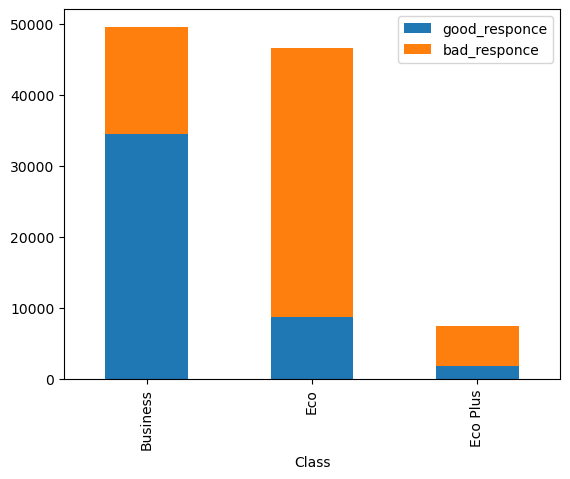

In [32]:
tmp_data.groupby('Class').agg('sum')[['good_responce', 'bad_responce']].plot(kind='bar',
                                                          stacked=True);

#### Numerical data

In [33]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,103594.0,39.380466,15.113125,7.0,27.0,40.0,51.0,85.0
Flight Distance,103594.0,1189.325202,997.297235,31.0,414.0,842.0,1743.0,4983.0
Inflight wifi service,103594.0,2.729753,1.327866,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103594.0,3.060081,1.525233,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103594.0,2.756984,1.398934,0.0,2.0,3.0,4.0,5.0
Gate location,103594.0,2.977026,1.277723,0.0,2.0,3.0,4.0,5.0
Food and drink,103594.0,3.202126,1.329401,0.0,2.0,3.0,4.0,5.0
Online boarding,103594.0,3.250497,1.349433,0.0,2.0,3.0,4.0,5.0
Seat comfort,103594.0,3.439765,1.318896,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,103594.0,3.358341,1.333030,0.0,2.0,4.0,4.0,5.0


Let's check dependencies between categorical data and responce column

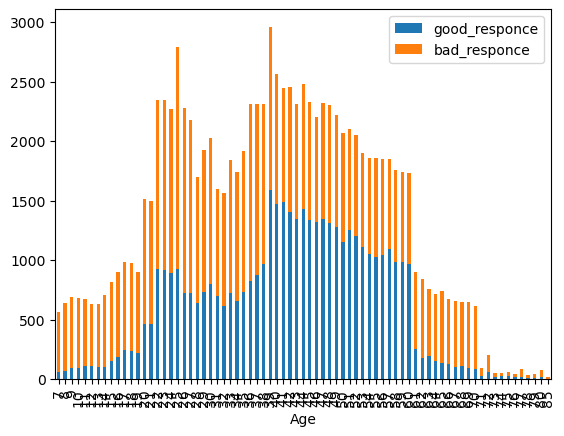

In [34]:
tmp_data.groupby('Age').agg('sum')[['good_responce', 'bad_responce']].plot(kind='bar',
                                                          stacked=True);

#### Vizualization of some continuous ordinal variables values

<AxesSubplot:xlabel='Flight Distance', ylabel='Density'>

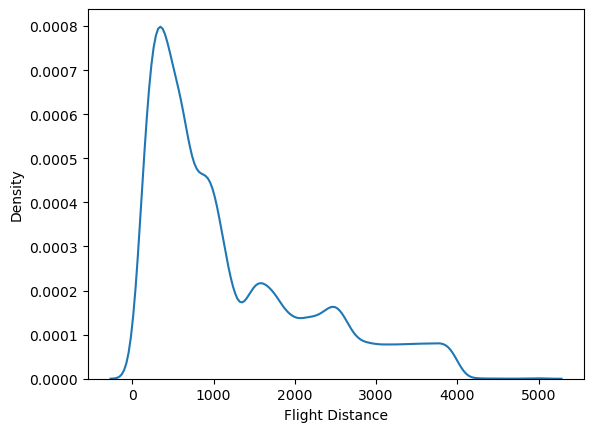

In [35]:
sns.kdeplot(data_train['Flight Distance'])

<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='Density'>

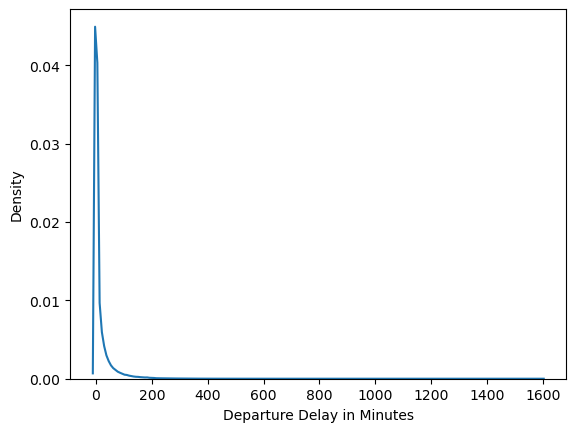

In [36]:
sns.kdeplot(data_train['Departure Delay in Minutes'])

<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='Density'>

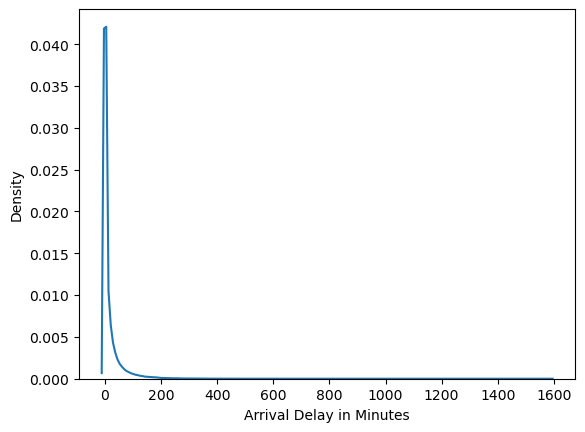

In [37]:
sns.kdeplot(data_train['Arrival Delay in Minutes'])

In [38]:
data_train['Customer Type'] = data_train['Customer Type'].map({'disloyal Customer': 0, 'Loyal Customer' :1})
data_train['Type of Travel'] = data_train['Type of Travel'].map({'Personal Travel': 0, 'Business travel' :1})
data_train['Class'] = data_train['Class'].map({'Eco': 0, 'Eco Plus' :1, 'Business': 2})
data_train['Gender'] = data_train['Gender'].map({'Female': 0, 'Male' :1})

In [39]:
data_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,13,0,1,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,0,25,1,2,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,1,26,1,2,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,1,25,1,2,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,1,61,1,2,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [40]:
data_test['Customer Type'] = data_test['Customer Type'].map({'disloyal Customer': 0, 'Loyal Customer' :1})
data_test['Type of Travel'] = data_test['Type of Travel'].map({'Personal Travel': 0, 'Business travel' :1})
data_test['Class'] = data_test['Class'].map({'Eco': 0, 'Eco Plus' :1, 'Business': 2})
data_test['Gender'] = data_test['Gender'].map({'Female': 0, 'Male' :1})

In [41]:
data_test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,52,1,0,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,0,1,36,1,2,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,1,0,20,1,0,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,1,1,44,1,2,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,0,1,49,1,0,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


Normalization of the numerial fields

In [42]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_train[numerical_cols] = sc.fit_transform(data_train[numerical_cols])
data_test[numerical_cols] = sc.transform(data_test[numerical_cols])

In [43]:
data_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,-1.745542,0,1,-0.731305,0.203521,0.616249,0.173716,-1.547312,...,1.231530,0.479237,-0.267143,0.311853,0.549773,1.156211,1.305913,0.268966,0.072905,0
1,1,0,-0.951526,1,2,-0.956916,0.203521,-0.695032,0.173716,0.017981,...,-1.769166,-1.849452,1.253304,-0.534854,-1.821038,0.305580,-1.742432,-0.360682,-0.237184,0
2,0,1,-0.885358,1,2,-0.047454,-0.549571,-0.695032,-0.541118,-0.764666,...,1.231530,0.479237,-0.267143,0.311853,0.549773,0.305580,1.305913,-0.386917,-0.392229,1
3,0,1,-0.951526,1,2,-0.629028,-0.549571,1.271890,1.603383,1.583273,...,-1.018992,-1.073222,1.253304,-0.534854,-1.821038,0.305580,-0.980345,-0.098328,-0.159662,0
4,1,1,1.430521,1,2,-0.977973,0.203521,-0.039391,0.173716,0.017981,...,-0.268818,-0.296993,0.493081,0.311853,-0.240497,-0.545051,-0.218259,-0.386917,-0.392229,1


In [44]:
data_test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,0.835009,1,0,-1.032120,1.709704,0.616249,0.173716,0.800627,...,1.231530,1.255467,1.253304,1.158561,-1.030767,1.156211,1.305913,0.924849,0.744766,1
1,0,1,-0.223679,1,2,1.678219,-1.302662,-1.350673,0.173716,-1.547312,...,0.481356,0.479237,0.493081,0.311853,-0.240497,0.305580,1.305913,-0.386917,-0.392229,1
2,1,0,-1.282366,1,0,-1.000033,-0.549571,-2.006314,-0.541118,0.800627,...,-1.018992,0.479237,-1.787590,-0.534854,-1.030767,-1.395683,-0.980345,-0.386917,-0.392229,0
3,1,1,0.305665,1,2,2.193614,-2.055754,-2.006314,-1.970785,-0.764666,...,-1.769166,-1.849452,-1.787590,-2.228269,-0.240497,-2.246314,0.543827,-0.386917,-0.237184,1
4,0,1,0.636505,1,0,-0.007345,-0.549571,-0.039391,0.888550,0.017981,...,-1.018992,-1.073222,-1.027367,-1.381562,0.549773,-1.395683,0.543827,-0.386917,0.124587,1


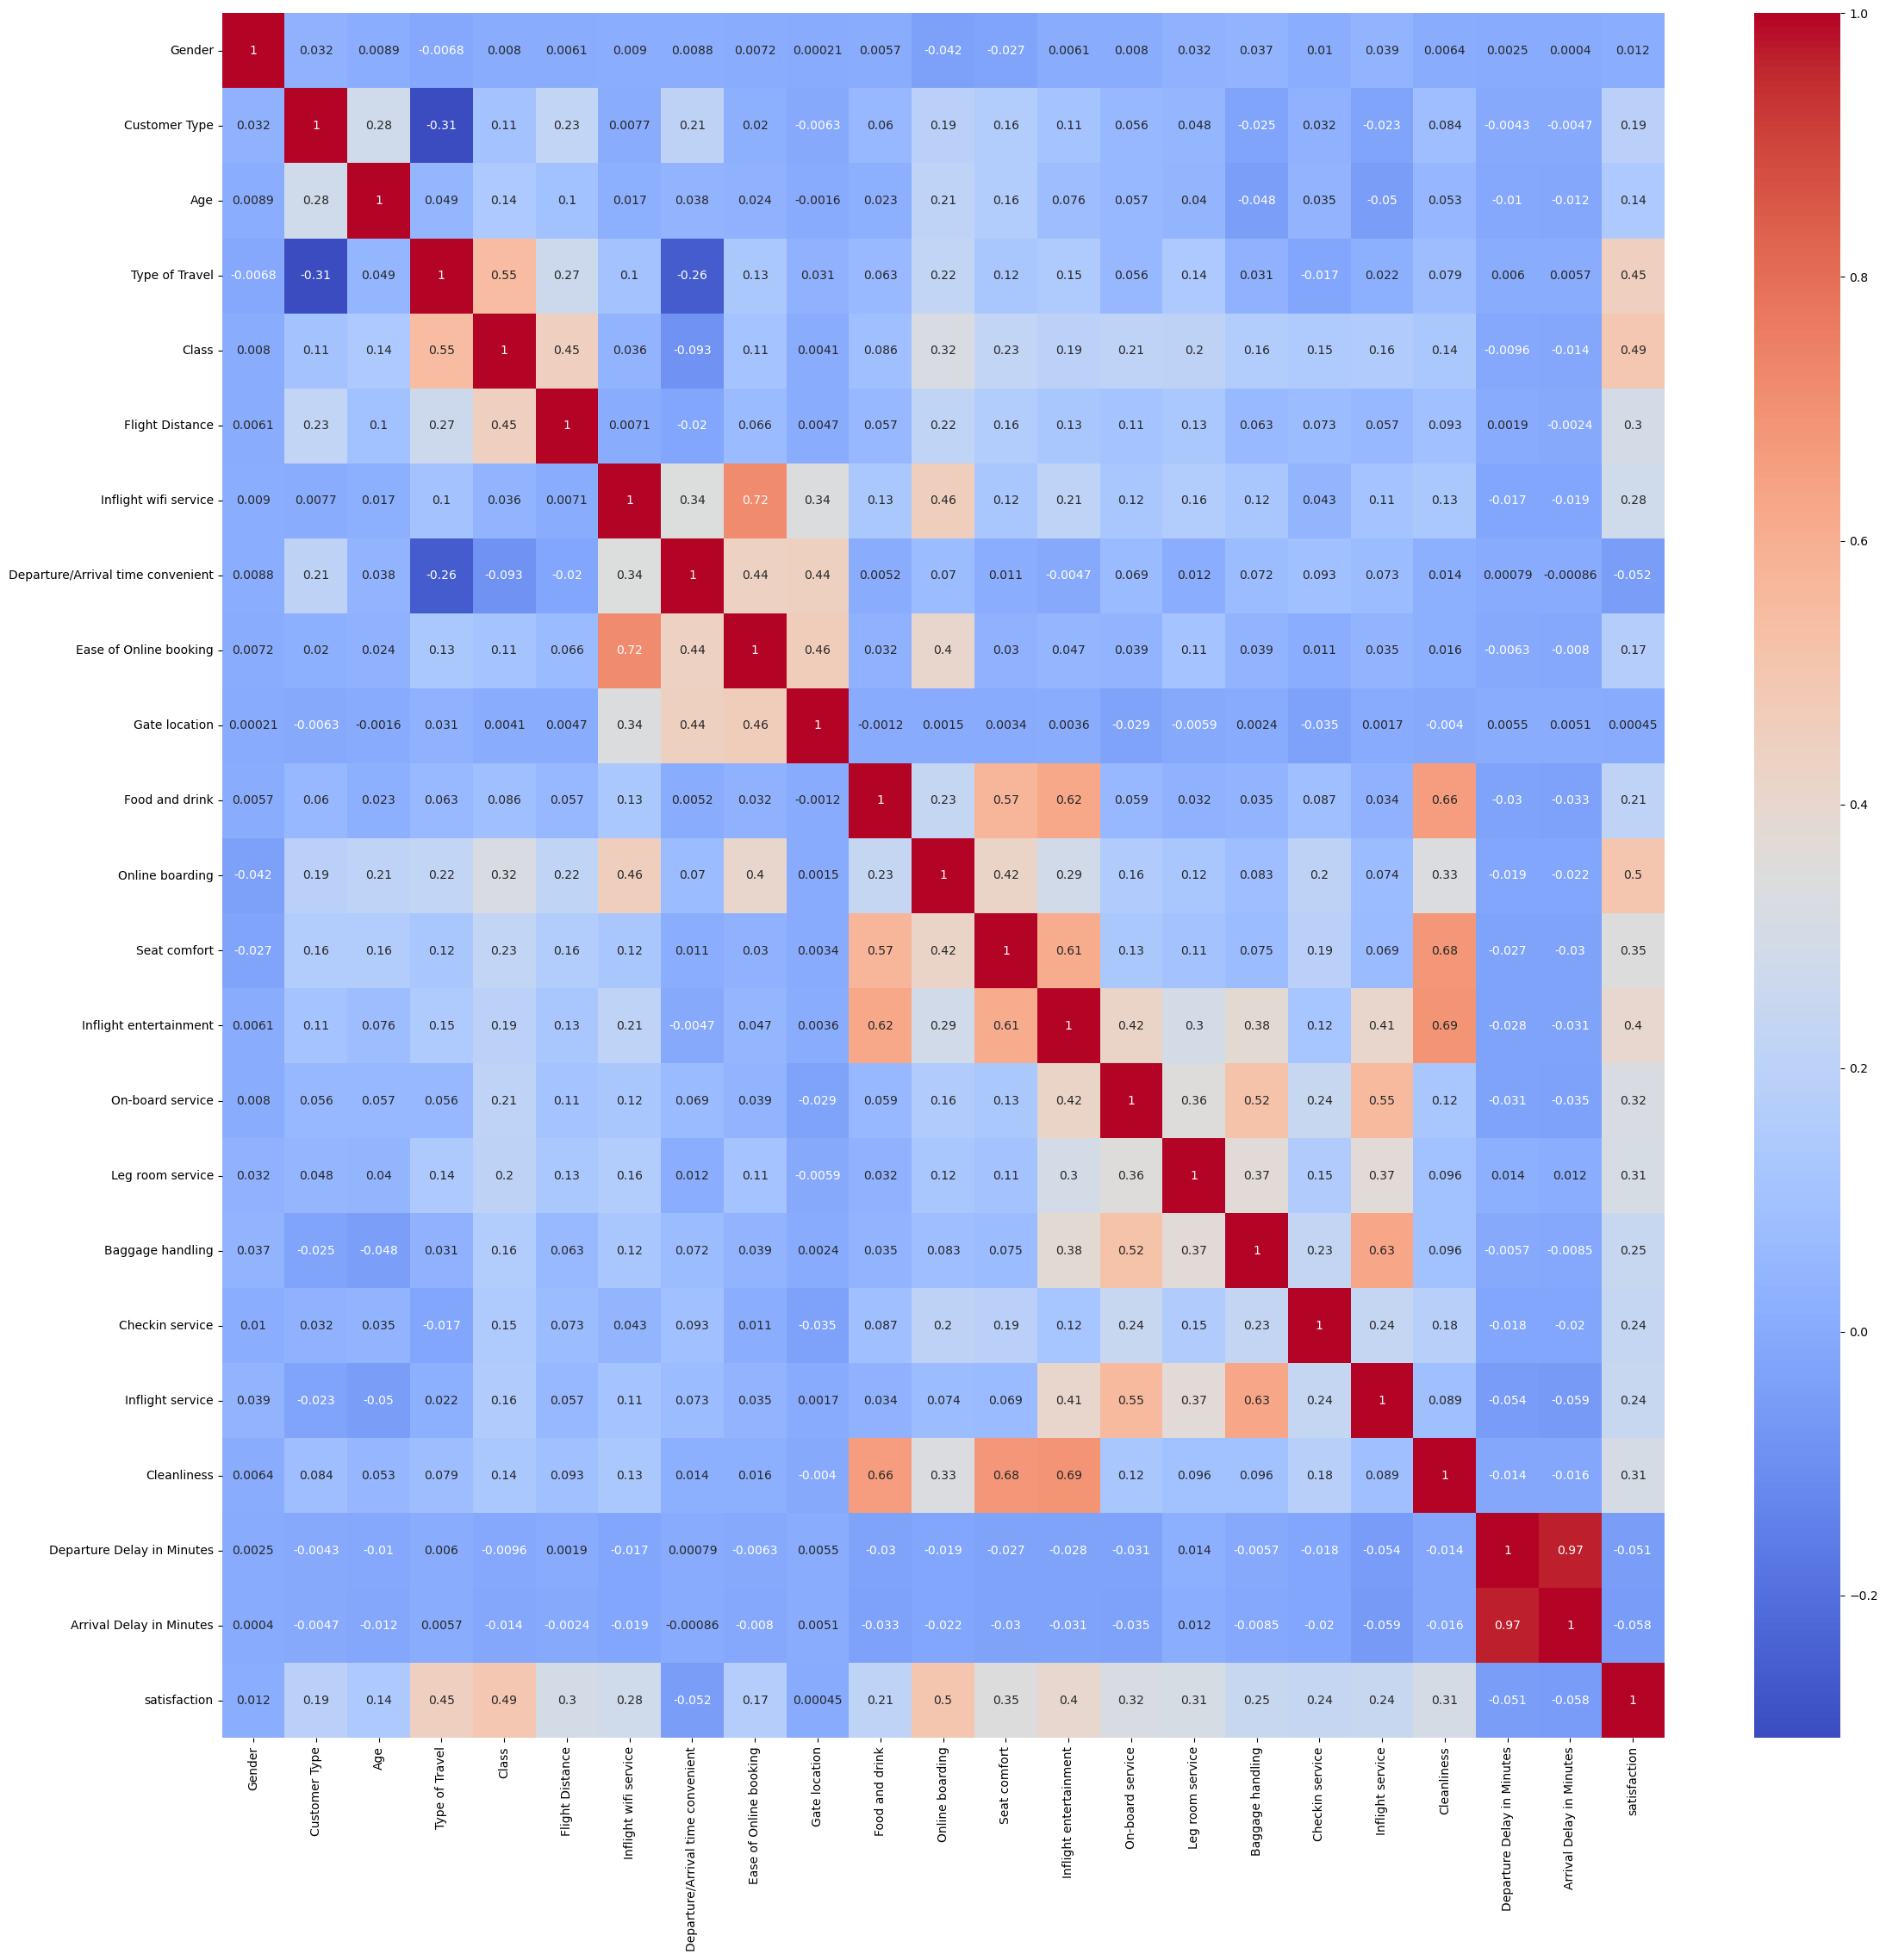

In [45]:
cor = data_train.corr()
plt.figure(figsize = (27,26))
sns.heatmap(cor, annot = True, cmap = 'coolwarm')
plt.show()

Taking into consideration the previous charts and a heatmap, we can select the following features:

In [46]:
manually_selected_columns = ['Online boarding', 'Class', 'Type of Travel', 'Inflight entertainment', 'Seat comfort',
                             'On-board service', 'Leg room service', 'Cleanliness', 'Baggage handling', 
                             'Inflight wifi service', 'Customer Type']

In [48]:
manually_selected_data_train = data_train[manually_selected_columns]
manually_selected_data_test = data_test[manually_selected_columns]
manually_selected_data_train['satisfaction'] = data_train['satisfaction']
manually_selected_data_test['satisfaction'] = data_test['satisfaction']

manually_selected_data_train.head(10)

D:\Anaconda\envs\ml\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\envs\ml\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Online boarding,Class,Type of Travel,Inflight entertainment,Seat comfort,On-board service,Leg room service,Cleanliness,Baggage handling,Inflight wifi service,Customer Type,satisfaction
0,-0.185632,1,0,1.231530,1.182991,0.479237,-0.267143,1.305913,0.311853,0.203521,1,0
1,-0.185632,2,1,-1.769166,-1.849863,-1.849452,1.253304,-1.742432,-0.534854,0.203521,0,0
2,1.296479,2,1,1.231530,1.182991,0.479237,-0.267143,1.305913,0.311853,-0.549571,1,1
3,-0.926688,2,1,-1.018992,-1.091649,-1.073222,1.253304,-0.980345,-0.534854,-0.549571,1,0
4,1.296479,2,1,-0.268818,1.182991,-0.296993,0.493081,-0.218259,0.311853,0.203521,1,1
5,-0.926688,0,0,-1.769166,-1.849863,-0.296993,0.493081,-1.742432,0.311853,0.203521,1,0
6,-0.926688,0,0,-1.018992,-1.091649,-0.296993,-0.267143,-0.980345,0.311853,-0.549571,1,0
7,1.296479,2,1,1.231530,1.182991,1.255467,1.253304,0.543827,1.158561,0.956612,1,1
8,-0.185632,2,1,-1.769166,-0.333436,-1.849452,-1.027367,-0.980345,-2.228269,-1.302662,1,0
9,-0.185632,0,1,-1.018992,-0.333436,-1.073222,-0.267143,-0.980345,0.311853,0.203521,0,0


In [49]:
manually_selected_data_test.head(10)

,Online boarding,Class,Type of Travel,Inflight entertainment,Seat comfort,On-board service,Leg room service,Cleanliness,Baggage handling,Inflight wifi service,Customer Type,satisfaction
0,0.555423,0,1,1.231530,-0.333436,1.255467,1.253304,1.305913,1.158561,1.709704,1,1
1,0.555423,2,1,0.481356,1.182991,0.479237,0.493081,1.305913,0.311853,-1.302662,1,1
2,-0.926688,0,1,-1.018992,-1.091649,0.479237,-1.787590,-0.980345,-0.534854,-0.549571,0,0
3,0.555423,2,1,-1.769166,0.424778,-1.849452,-1.787590,0.543827,-2.228269,-2.055754,1,1
4,-1.667744,0,1,-1.018992,-1.091649,-1.073222,-1.027367,0.543827,-1.381562,-0.549571,1,1
5,1.296479,0,1,1.231530,-0.333436,0.479237,-0.267143,1.305913,-2.228269,0.203521,1,1
6,1.296479,2,1,1.231530,1.182991,1.255467,1.253304,-0.218259,1.158561,1.709704,1,1
7,0.555423,2,1,0.481356,1.182991,0.479237,0.493081,-0.218259,0.311853,-0.549571,1,1
8,1.296479,0,1,1.231530,1.182991,-1.073222,-1.027367,1.305913,1.158561,1.709704,1,1
9,0.555423,2,1,0.481356,0.424778,0.479237,0.493081,0.543827,0.311853,-0.549571,1,1


We will write manually selected data to the appropriate csv file

In [50]:
from pathlib import Path  
filepath = Path('data/airline_manually_selected_data_train.csv')   
manually_selected_data_train.to_csv(filepath, index=False)  

filepath = Path('data/airline_manually_selected_data_test.csv')   
manually_selected_data_test.to_csv(filepath, index=False)  

The same we will do with the whole dataset partially preprocessed

In [51]:
from pathlib import Path  
filepath = Path('data/airline_preprocessed_data_train.csv')   
data_train.to_csv(filepath, index=False)  

filepath = Path('data/airline_preprocessed_data_test.csv')   
data_test.to_csv(filepath, index=False) 

### Devide our dataset for data and target

In [53]:
X_train = data_train.drop(['satisfaction'], axis=1)
X_test  = data_test.drop(['satisfaction'], axis=1)
X_test

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,1,0.835009,1,0,-1.032120,1.709704,0.616249,0.173716,0.800627,...,-0.333436,1.231530,1.255467,1.253304,1.158561,-1.030767,1.156211,1.305913,0.924849,0.744766
1,0,1,-0.223679,1,2,1.678219,-1.302662,-1.350673,0.173716,-1.547312,...,1.182991,0.481356,0.479237,0.493081,0.311853,-0.240497,0.305580,1.305913,-0.386917,-0.392229
2,1,0,-1.282366,1,0,-1.000033,-0.549571,-2.006314,-0.541118,0.800627,...,-1.091649,-1.018992,0.479237,-1.787590,-0.534854,-1.030767,-1.395683,-0.980345,-0.386917,-0.392229
3,1,1,0.305665,1,2,2.193614,-2.055754,-2.006314,-1.970785,-0.764666,...,0.424778,-1.769166,-1.849452,-1.787590,-2.228269,-0.240497,-2.246314,0.543827,-0.386917,-0.237184
4,0,1,0.636505,1,0,-0.007345,-0.549571,-0.039391,0.888550,0.017981,...,-1.091649,-1.018992,-1.073222,-1.027367,-1.381562,0.549773,-1.395683,0.543827,-0.386917,0.124587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,1,0,-0.356015,1,2,-0.665126,0.203521,-0.039391,0.173716,-1.547312,...,0.424778,0.481356,-0.296993,-1.027367,0.311853,0.549773,1.156211,0.543827,-0.386917,-0.392229
25972,1,1,-1.083862,1,2,-0.544800,0.956612,0.616249,0.888550,0.800627,...,0.424778,0.481356,0.479237,1.253304,1.158561,1.340043,1.156211,0.543827,-0.386917,-0.392229
25973,0,1,-1.480870,0,0,-0.362306,-0.549571,1.271890,-1.255951,1.583273,...,-1.091649,-1.018992,0.479237,-0.267143,0.311853,1.340043,0.305580,-0.980345,-0.386917,-0.392229
25974,1,1,-1.679374,1,2,-0.062494,0.203521,-0.039391,0.173716,0.017981,...,0.424778,0.481356,-0.296993,-1.027367,1.158561,0.549773,1.156211,0.543827,-0.386917,-0.392229


In [55]:
y_train = data_train['satisfaction'].values
y_test = data_test['satisfaction'].values

## Feature selection with RandomForest

In [56]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5)

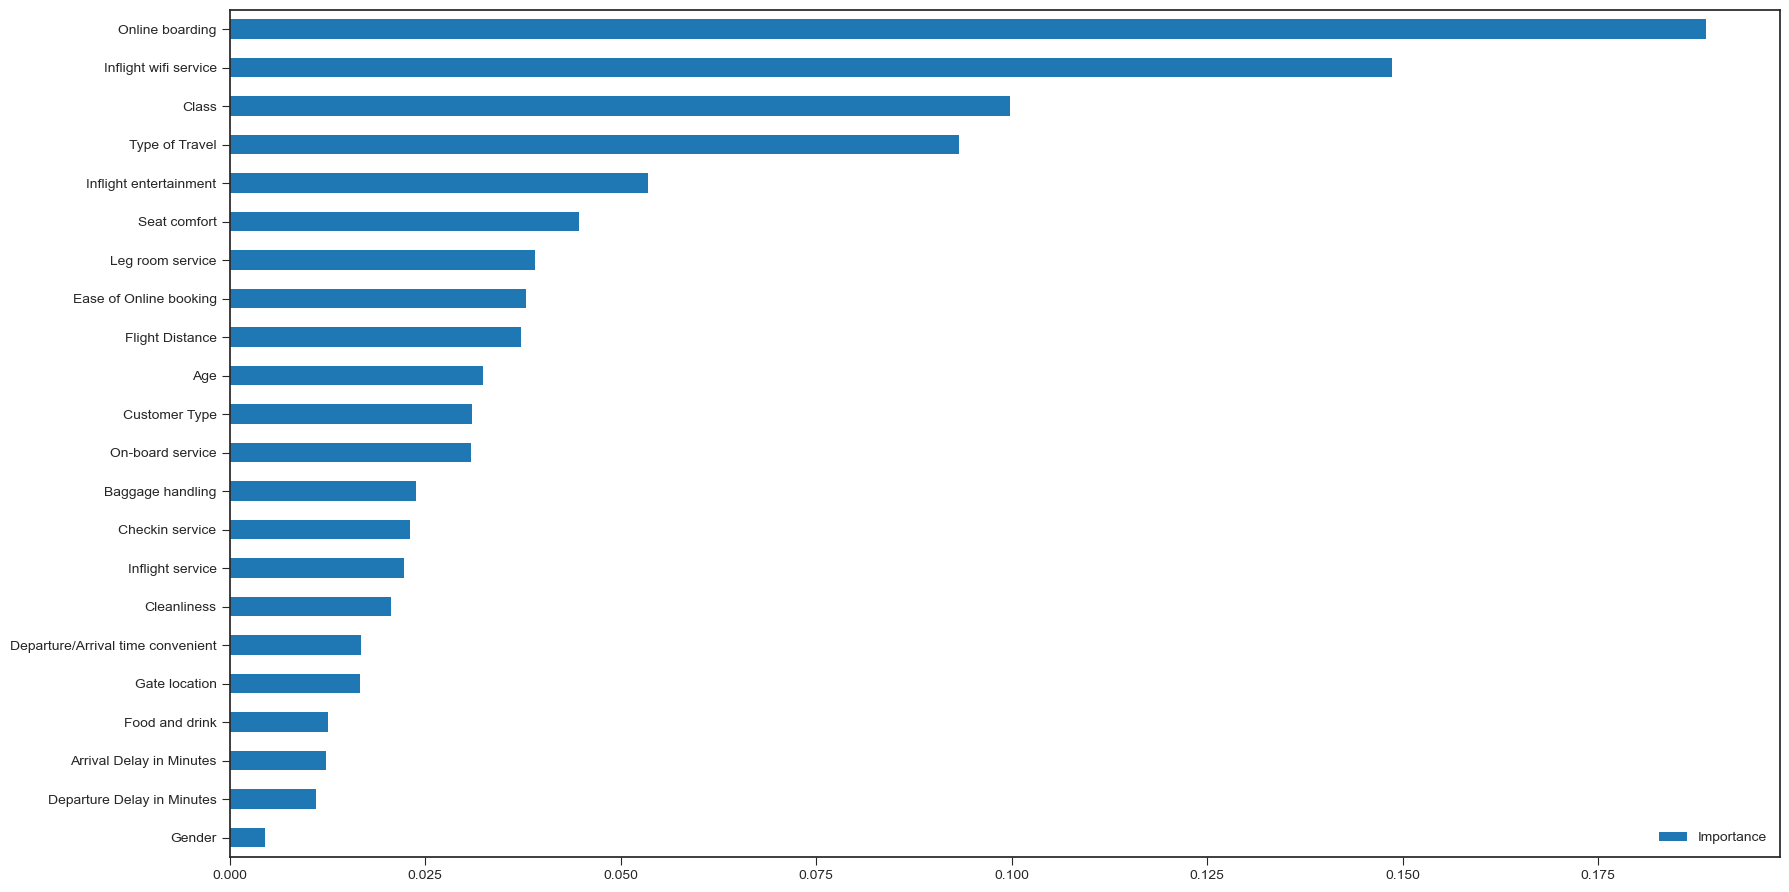

In [57]:
# Using Random Forest to gain an insight on Feature Importance
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(data_train.drop('satisfaction', axis=1), data_train['satisfaction'])

plt.style.use('seaborn-ticks')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=data_train.drop('satisfaction', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));

Stwórzmy dataframe automatycznie wyznaczonych cech

In [59]:
atomatically_selected_data_columns = importance.sort_values(by='Importance', ascending=False).head(11).index
atomatically_selected_data_train = data_train[atomatically_selected_data_columns]
atomatically_selected_data_train['satisfaction'] = data_train['satisfaction']

atomatically_selected_data_test = data_test[atomatically_selected_data_columns]
atomatically_selected_data_test['satisfaction'] = data_test['satisfaction']

atomatically_selected_data_train.head(11)

D:\Anaconda\envs\ml\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\envs\ml\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Online boarding,Inflight wifi service,Class,Type of Travel,Inflight entertainment,Seat comfort,Leg room service,Ease of Online booking,Flight Distance,Age,Customer Type,satisfaction
0,-0.185632,0.203521,1,0,1.231530,1.182991,-0.267143,0.173716,-0.731305,-1.745542,1,0
1,-0.185632,0.203521,2,1,-1.769166,-1.849863,1.253304,0.173716,-0.956916,-0.951526,0,0
2,1.296479,-0.549571,2,1,1.231530,1.182991,-0.267143,-0.541118,-0.047454,-0.885358,1,1
3,-0.926688,-0.549571,2,1,-1.018992,-1.091649,1.253304,1.603383,-0.629028,-0.951526,1,0
4,1.296479,0.203521,2,1,-0.268818,1.182991,0.493081,0.173716,-0.977973,1.430521,1,1
5,-0.926688,0.203521,0,0,-1.769166,-1.849863,0.493081,-0.541118,-0.009351,-0.885358,1,0
6,-0.926688,-0.549571,0,0,-1.018992,-1.091649,-0.267143,-0.541118,0.086910,0.504169,1,0
7,1.296479,0.956612,2,1,1.231530,1.182991,1.253304,0.888550,0.847971,0.835009,1,1
8,-0.185632,-1.302662,2,1,-1.769166,-0.333436,-1.027367,-0.541118,-0.337238,0.107161,1,0
9,-0.185632,0.203521,0,1,-1.018992,-0.333436,-0.267143,0.173716,-0.128674,-1.282366,0,0


Zapiszmy automatycznie wyznaczone cechy do oddzielnego pliku

In [60]:
from pathlib import Path  
filepath = Path('data/airline_atomatically_selected_data_train.csv')   
atomatically_selected_data_train.to_csv(filepath, index=False)  

filepath = Path('data/airline_atomatically_selected_data_test.csv')   
atomatically_selected_data_test.to_csv(filepath, index=False) 